<a href="https://colab.research.google.com/github/rajeshpahari/Own-Work/blob/ML/Ml000_Simple_Linear_regression_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Liner Regression or Ordinary Least Square method[OLS]

In [3]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns


In [4]:
# from google.colab import files
# files.upload()

# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d 'amitabhajoy/bengaluru-house-price-data'
# !unzip /content/bengaluru-house-price-data.zip


# Data Import & Observations and select data for OLS

In [5]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df=df[['size','price']]
df.head()

,size,price
0,2 BHK,39.07
1,4 Bedroom,120.00
2,3 BHK,62.00
3,3 BHK,95.00
4,2 BHK,51.00


In [7]:
#Any empty data??
df.isnull().sum()

size     16
price     0
dtype: int64

In [8]:
#remove empty data
df.dropna(inplace=True)
df.isnull().sum()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


size     0
price    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    13304 non-null  object 
 1   price   13304 non-null  float64
dtypes: float64(1), object(1)
memory usage: 311.8+ KB


In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
#make size numerical by removing unwanted data
df['size']=df['size'].apply(lambda x: int(str(x).split(' ')[0]))

<ipython-input-11-0d6af68ce589>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=df['size'].apply(lambda x: int(str(x).split(' ')[0]))


In [12]:
#Check conversion
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
#Find corelation of size and price
df.corr()

,size,price
size,1.000000,0.398292
price,0.398292,1.000000


<AxesSubplot:>

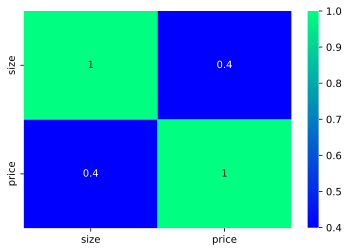

In [14]:
#Plot it
sns.heatmap(df.corr(),annot=True,cmap='winter')
#Only 40% relation

# Some theoraticall Analysis

<AxesSubplot:xlabel='size', ylabel='price'>

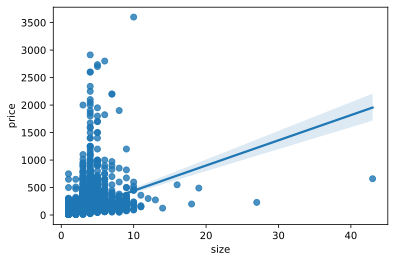

In [15]:
# Equaltion of OLS y=b1*x+b0
sns.regplot(x=df['size'],y=df['price'])


In [16]:
#Not a great solution we found our solution can only provide 40% correct result
#lets find out what is b1 & b0 here
X=df['size']
y=df['price']
np.polyfit(X,y,deg=1)

array([ 45.82398869, -15.89666318])

In [17]:
#So  our b1= 45.82398869,b0=-15.89666318

In [18]:
## What about if we want to find a polynomial function of degree 3..what will be our coefficients??
np.polyfit(X,y,deg=3)


array([   0.10908253,   -6.52860705,   98.19904288, -105.55899225])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

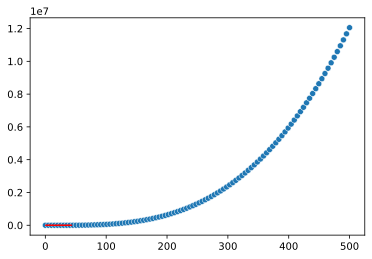

In [19]:
# Well so what is our function then..how does it look like?
#Now with some new data points we create the function first using 500 random values
X_imaginary=np.linspace(0,500,100)
y_imaginary= (0.10908253*X_imaginary**3)+(-6.52860705*X_imaginary**2)+(98.19904288*X_imaginary)+-105.55899225

plt.plot(X,y,color='red')

sns.scatterplot(X_imaginary,y_imaginary)
#Now we plot our X & y pint to see how this fnction is fitting
# plt.plot(X,y,color='red')   #put this code on top of sns plot





In [20]:
# The above is example of OLS with Polynomial...Lets now comeback to orginal work 

# Data Split

In [21]:
X=df.drop('price',axis=1)
y=df['price']
X.shape,y.shape

((13304, 1), (13304,))

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10643, 1), (2661, 1), (10643,), (2661,))

# Model Building and fitting

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model Performance

In [25]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.16115869234032898
Model Score- Testing: 0.14802182505758732
-----------------
Mean Absolute Error:Train: 58.84475852216833
Mean Absolute Error:Test: 60.07062598460659
-----------------
RMSE:Train: 136.05118081634276
RMSE:Test: 7.750524239340626


In [26]:
#very Poor...Can we Apply Polinonimal regression

# Polynomial regression - Theory

<ipython-input-27-84df85ff9262>:2: RuntimeWarning: divide by zero encountered in log
  y= np.log(x)


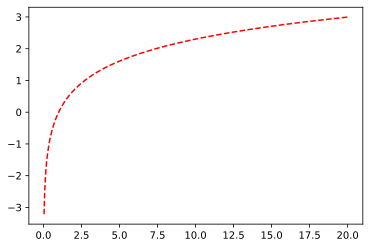

In [27]:
x= np.linspace(0,20,500)
y= np.log(x)
plt.plot(x,y,'r--');

<ipython-input-28-b7467a543f17>:1: RuntimeWarning: divide by zero encountered in log
  y= np.log(x**2)


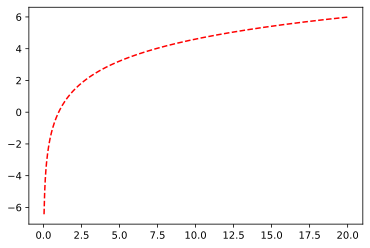

In [28]:
y= np.log(x**2)
plt.plot(x,y,'r--');

<ipython-input-29-f18e0d1bffaf>:1: RuntimeWarning: divide by zero encountered in log
  y= np.log(x)
<ipython-input-29-f18e0d1bffaf>:3: RuntimeWarning: divide by zero encountered in log
  y= np.log(x**2)
<ipython-input-29-f18e0d1bffaf>:5: RuntimeWarning: divide by zero encountered in log
  y= np.log(x**3)


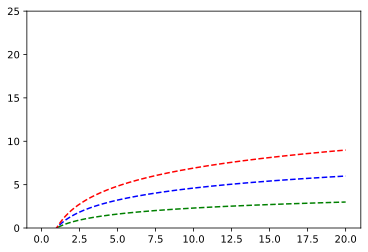

In [29]:
y= np.log(x)
plt.plot(x,y,'g--');
y= np.log(x**2)
plt.plot(x,y,'b--');
y= np.log(x**3)
plt.ylim([0,25])
plt.plot(x,y,'r--');


#But This doesnt works always for all function or features

# Create Polynomial Features- Kind of features scaling#

In [30]:
X=df.drop('price',axis=1)
y=df['price']
X.shape,y.shape
from sklearn.preprocessing import PolynomialFeatures
scalar=PolynomialFeatures(degree=2,include_bias=False)
#What is interaction???

X_transform=scalar.fit_transform(X) # Dont need to apply train or test..do it for both
X_transform.shape

(13304, 2)

In [31]:
#Check
df.iloc[0]

size      2.00
price    39.07
Name: 0, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10643, 2), (2661, 2), (10643,), (2661,))

In [33]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.1792686345706047
Model Score- Testing: 0.16290538441775781
-----------------
Mean Absolute Error:Train: 59.521678894451476
Mean Absolute Error:Test: 59.261914007988835
-----------------
RMSE:Train: 135.9227743902224
RMSE:Test: 7.69817601825191


#Not much improvement....Lets have some    Parametric Experiment

In [35]:
deg=np.arange(2,5)
#deg
trainacc=[]
testacc=[]
for i in deg:
  scalar= PolynomialFeatures(degree=i,include_bias=False)
  X_transform= scalar.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2)
  model=LinearRegression()
  model.fit(X_train,y_train)
  trainacc.append(model.score(X_train,y_train)*100)
  testacc.append(model.score(X_test,y_test)*100)
  print(model.score(X_train,y_train))





0.17169987789443408
0.1800234622943323
0.19082231577576036


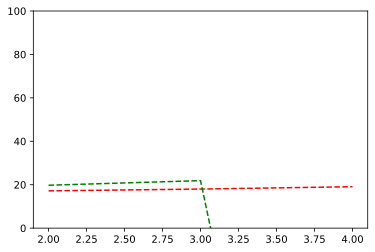

In [36]:
plt.plot(deg,trainacc,'r--')
plt.plot(deg,testacc,'g--')
plt.ylim([0,100])
plt.show()

In [38]:
#Overfitting & Under fitting

deg=np.arange(2,5)
#deg
trainrmse=[]
testrmse=[]
for i in deg:
  scalar= PolynomialFeatures(degree=i,include_bias=False)
  X_transform= scalar.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2)
  model=LinearRegression()
  model.fit(X_train,y_train)
  trainrmse.append(np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
  testrmse.append(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))
  #print(model.score(X_train,y_train))


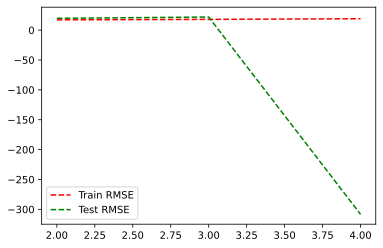

In [39]:
plt.plot(deg,trainacc,'r--',label='Train RMSE')
plt.plot(deg,testacc,'g--',label='Test RMSE')
plt.legend()
plt.show()